In [1]:
from helpers import *
import os
print(os.getcwd())

/home/workspace/2022.micro.artifact/experiments-matmul2


In [2]:
verbose = True
architecture2 = "/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml"
component = "/home/workspace/2022.micro.artifact/experiments-matmul/compound_components.yaml"
ERT_output_path = "ERT.yaml"
ART_output_path = "ART.yaml"
sparse_opts = "SI-SW.yaml"
workload = "/home/workspace/2022.micro.artifact/experiments-matmul2/matmul2.yaml"
mapper = "/home/workspace/2022.micro.artifact/experiments-matmul/mapper.yaml"
mapping = "/home/workspace/2022.micro.artifact/experiments-matmul/timeloop_temp/timeloop-mapper.map.yaml"
constraints = "/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml"

In [3]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/local/

In [8]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
workload = "/home/workspace/2022.micro.artifact/experiments-matmul2/osc1.yaml"
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]
print(mapping_path)

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/osc1.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

INFO: Banded distribution interpreted density: total nnzs: 16384  density: 6.10352e-05
Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete

[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 22319.811 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 21317.721 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[O] N1 
[  1] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 22319.811 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  1] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 21147.278 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[O] N1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 38186.492 | L4[] M32 N256 M4X - L3[I] N16 M8 - L2[W] M8 - L1[O] N4 M2 - L0[] N1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 37249.461 | L4[] M32 N256 M4X - L3[I] N16 M8 - L2[W] M8 - L1[O] N4 M2 - L0[I] N1 
[  2] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 



Summary stats for best mapping found by mapper:
  Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 21147.278


KeyboardInterrupt: 

In [5]:
# If you already have mapping
output_path = run_timeloop(
    arch_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/matmul2.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.14979767799377441
Timeloop completed successfully.


['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


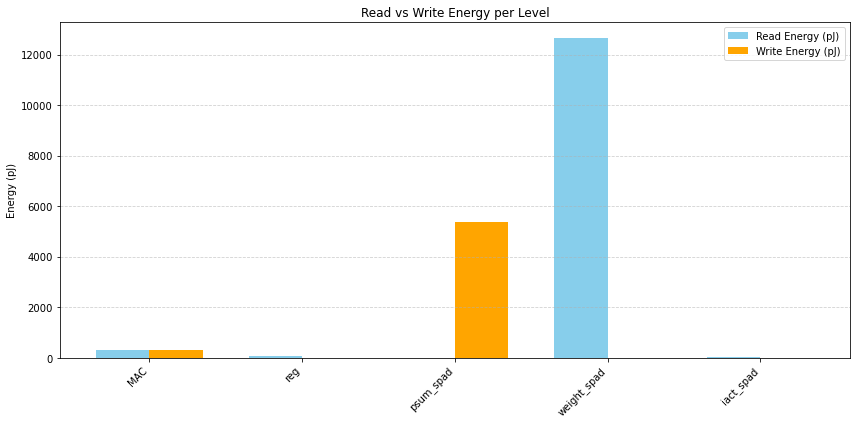

In [6]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])

In [13]:
total_energy = 0
energies = {}
utilization = {}
for el, el_map in output["energy_breakdown_pJ"].items():
    energies[el] = el_map["energy"]
    total_energy += el_map["energy"]
    utilization[el] = el_map["utilization"]
print(f"Total Energy: {total_energy}")
print("Energies", energies)
print("Utilization", utilization)
    


Total Energy: 21552.013279999996
Energies {'MAC': 888.6777199999999, 'reg': 3539.808, 'psum_spad': 5379.92404, 'weight_spad': 11724.12236, 'iact_spad': 19.48116, 'BackingStorage': 0.0}
Utilization {'MAC': 0.125, 'reg': 2.288818359375e-05, 'psum_spad': 0.125, 'weight_spad': 0.041666666666666664, 'iact_spad': 0.0234375, 'BackingStorage': 0}


In [4]:
def run_timeloop_helper(workload, mapping_path):
    print("Workload", workload)
    
    output_path = run_timeloop(
        arch_yaml=architecture2,
        workload=workload,
        sparse_opts=sparse_opts,
        mapping=mapping_path,
        constraints=constraints,
        mapper=mapper,
        ert_path=ERT_output_path,
        art_path=ART_output_path,
        output_dir="timeloop_output_test_3"
    )

    output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
    plot_read_write_energy(output["energy_breakdown_pJ"])
    
    total_energy = 0
    energies = {}
    utilization = {}
    for el, el_map in output["energy_breakdown_pJ"].items():
        energies[el] = el_map["energy"]
        total_energy += el_map["energy"]
        utilization[el] = el_map["utilization"]
    print(f"Total Energy: {total_energy}")
    print("Energies", energies)
    print("Utilization", utilization)
    return total_energy
    

/home/workspace/2022.micro.artifact/experiments-matmul2/osc1.yaml
['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/osc1.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

INFO: Banded distribution interpreted density: total nnzs: 16384  density: 6.10352e-05
Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture 

[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 22319.811 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 21317.721 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[O] N1 
[  1] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 22319.811 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  1] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 21147.278 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[O] N1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 38186.492 | L4[] M32 N256 M4X - L3[I] N16 M8 - L2[W] M8 - L1[O] N4 M2 - L0[] N1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 37249.461 | L4[] M32 N256 M4X - L3[I] N16 M8 - L2[W] M8 - L1[O] N4 M2 - L0[I] N1 
[  2] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 

[  1] STATEMENT: 2500 valid mappings found, terminating search.
[  2] STATEMENT: 2500 valid mappings found, terminating search.
2025-05-06 01:28:56,014 - timeloop_mapper - WARNING - No stats file found
2025-05-06 01:28:56,021 - timeloop_mapper - INFO - Best mapping file found
2025-05-06 01:28:56,023 - timeloop_mapper - WARNING - No energy reference file found




Summary stats for best mapping found by mapper:
  Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 4602.201
1
Workload /home/workspace/2022.micro.artifact/experiments-matmul2/osc1.yaml
Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/osc1.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.13723397254943848
Timeloop completed successfully.
['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


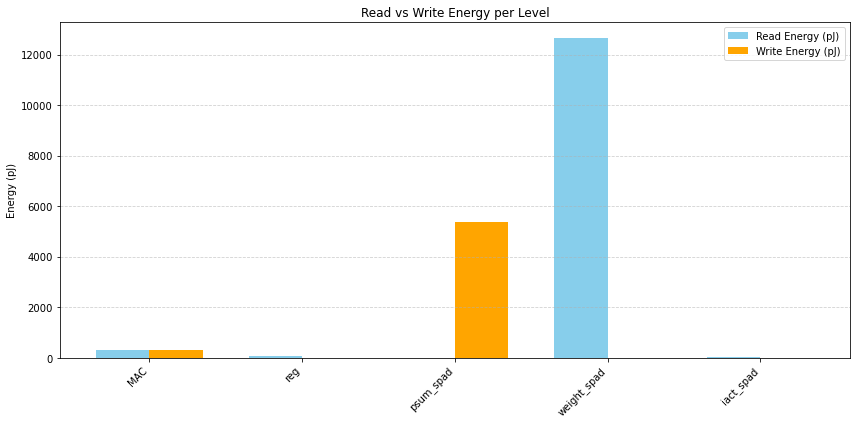

Total Energy: 18408.80356
Energies {'MAC': 310.34848, 'reg': 55.51199999999999, 'psum_spad': 5371.253680000001, 'weight_spad': 12641.8944, 'iact_spad': 29.795, 'BackingStorage': 0.0}
Utilization {'MAC': 0.25, 'reg': 4.57763671875e-05, 'psum_spad': 0.0078125, 'weight_spad': 0.0013020833333333333, 'iact_spad': 0.046875, 'BackingStorage': 0}
/home/workspace/2022.micro.artifact/experiments-matmul2/osc2.yaml
['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/osc2.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\___

[  1] Utilization = 0.38 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 6905.450 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  0] Utilization = 0.38 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 6905.450 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  1] Utilization = 0.38 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 6647.930 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[O] N1 
[  0] Utilization = 0.38 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 6687.587 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[O] N1 
[  0] Utilization = 0.38 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 5725.486 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] M4 N2 - L1[O] N4 M2 - L0[I] N1 
[  2] STATEMENT: 10000 invalid mappings (9282 fanout, 718 capacity) found since the last valid mapping, terminating search.
[  3] STATEMENT: 10000 invalid mappings (9287 fanout, 713 capacity) found since the last valid mapp



Summary stats for best mapping found by mapper:
  Utilization = 0.38 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 5725.486
1
Workload /home/workspace/2022.micro.artifact/experiments-matmul2/osc2.yaml
Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/osc2.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.13956141471862793
Timeloop completed successfully.
['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


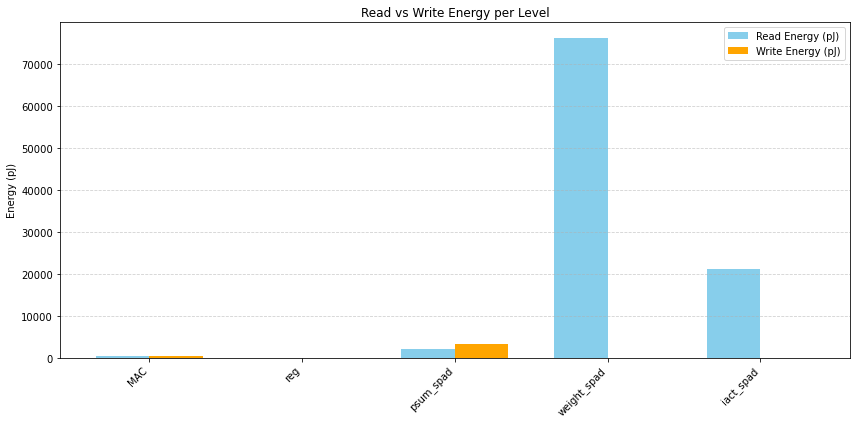

Total Energy: 103058.74924
Energies {'MAC': 304.49892, 'reg': 3.6719999999999997, 'psum_spad': 5393.35584, 'weight_spad': 76110.848, 'iact_spad': 21246.374480000002, 'BackingStorage': 0.0}
Utilization {'MAC': 0.5, 'reg': 0.000518798828125, 'psum_spad': 0.03125, 'weight_spad': 0.020833333333333332, 'iact_spad': 0.25, 'BackingStorage': 0}
/home/workspace/2022.micro.artifact/experiments-matmul2/osc3.yaml
['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/osc3.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/

[  1] Utilization = 0.49 | pJ/Algorithmic-Compute =    0.002 | pJ/Compute = 2981.592 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  0] Utilization = 0.49 | pJ/Algorithmic-Compute =    0.002 | pJ/Compute = 2981.592 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  1] Utilization = 0.49 | pJ/Algorithmic-Compute =    0.002 | pJ/Compute = 2956.749 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[O] N1 
[  0] Utilization = 0.49 | pJ/Algorithmic-Compute =    0.002 | pJ/Compute = 2963.406 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[O] N1 
[  0] Utilization = 0.49 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 1739.791 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] M4 N2 - L1[O] N4 M2 - L0[I] N1 
[  2] STATEMENT: 10000 invalid mappings (9282 fanout, 718 capacity) found since the last valid mapping, terminating search.
[  3] STATEMENT: 10000 invalid mappings (9287 fanout, 713 capacity) found since the last valid mapp



Summary stats for best mapping found by mapper:
  Utilization = 0.49 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 1739.791
1
Workload /home/workspace/2022.micro.artifact/experiments-matmul2/osc3.yaml
Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/osc3.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.13659071922302246
Timeloop completed successfully.
['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


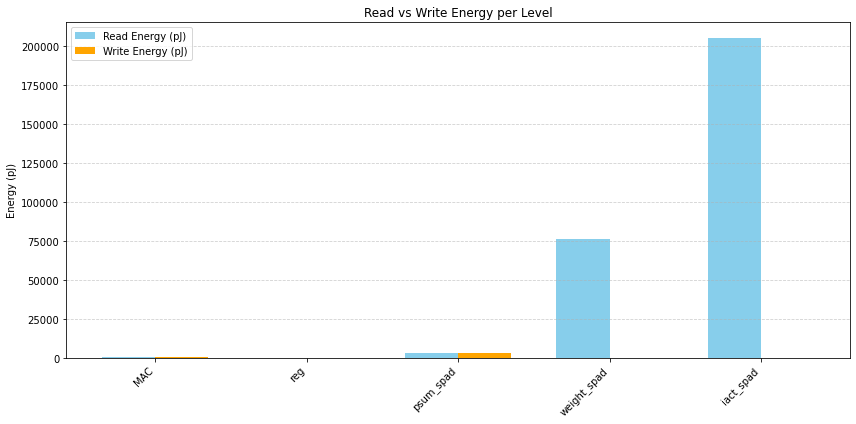

Total Energy: 287065.44795999996
Energies {'MAC': 386.93652, 'reg': 35.42399999999999, 'psum_spad': 5575.272480000001, 'weight_spad': 76110.848, 'iact_spad': 204956.96695999996, 'BackingStorage': 0.0}
Utilization {'MAC': 0.5, 'reg': 0.0050048828125, 'psum_spad': 0.03125, 'weight_spad': 0.020833333333333332, 'iact_spad': 0.25, 'BackingStorage': 0}
/home/workspace/2022.micro.artifact/experiments-matmul2/osc4.yaml
['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/osc4.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\_

[  1] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.016 | pJ/Compute = 2551.038 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.016 | pJ/Compute = 2551.038 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.008 | pJ/Compute = 1301.665 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] M4 N2 - L1[O] N4 M2 - L0[I] N1 
[  2] STATEMENT: 10000 invalid mappings (9282 fanout, 718 capacity) found since the last valid mapping, terminating search.
[  3] STATEMENT: 10000 invalid mappings (9287 fanout, 713 capacity) found since the last valid mapping, terminating search.
[  1] STATEMENT: 10000 invalid mappings (9291 fanout, 709 capacity) found since the last valid mapping, terminating search.
[  0] STATEMENT: 10000 invalid mappings (9294 fanout, 706 capacity) found since the last valid mapping, terminating search.
2025-05-06 01:29:00,499 - timeloop_map



Summary stats for best mapping found by mapper:
  Utilization = 0.50 | pJ/Algorithmic-Compute =    0.008 | pJ/Compute = 1301.665
1
Workload /home/workspace/2022.micro.artifact/experiments-matmul2/osc4.yaml
Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/osc4.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.14029502868652344
Timeloop completed successfully.
['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


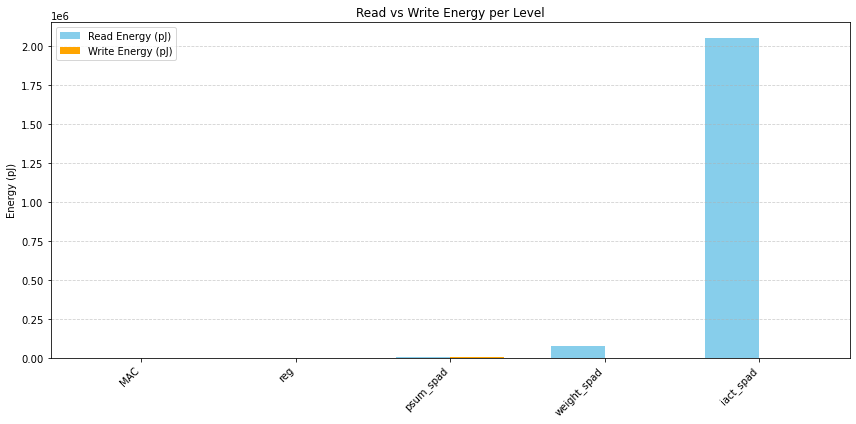

Total Energy: 2133428.3172
Energies {'MAC': 1213.59168, 'reg': 354.02399999999994, 'psum_spad': 7434.8648, 'weight_spad': 76110.848, 'iact_spad': 2048314.98872, 'BackingStorage': 0.0}
Utilization {'MAC': 0.5, 'reg': 0.050018310546875, 'psum_spad': 0.03125, 'weight_spad': 0.020833333333333332, 'iact_spad': 0.25, 'BackingStorage': 0}
/home/workspace/2022.micro.artifact/experiments-matmul2/osc5.yaml
['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/osc5.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___

[  1] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.038 | pJ/Compute = 2522.343 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.038 | pJ/Compute = 2522.343 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.019 | pJ/Compute = 1272.359 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] M4 N2 - L1[O] N4 M2 - L0[I] N1 
[  2] STATEMENT: 10000 invalid mappings (9282 fanout, 718 capacity) found since the last valid mapping, terminating search.
[  3] STATEMENT: 10000 invalid mappings (9287 fanout, 713 capacity) found since the last valid mapping, terminating search.
[  1] STATEMENT: 10000 invalid mappings (9291 fanout, 709 capacity) found since the last valid mapping, terminating search.
[  0] STATEMENT: 10000 invalid mappings (9294 fanout, 706 capacity) found since the last valid mapping, terminating search.
2025-05-06 01:29:02,052 - timeloop_map



Summary stats for best mapping found by mapper:
  Utilization = 0.50 | pJ/Algorithmic-Compute =    0.019 | pJ/Compute = 1272.359
1
Workload /home/workspace/2022.micro.artifact/experiments-matmul2/osc5.yaml
Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/osc5.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.1422131061553955
Timeloop completed successfully.
['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


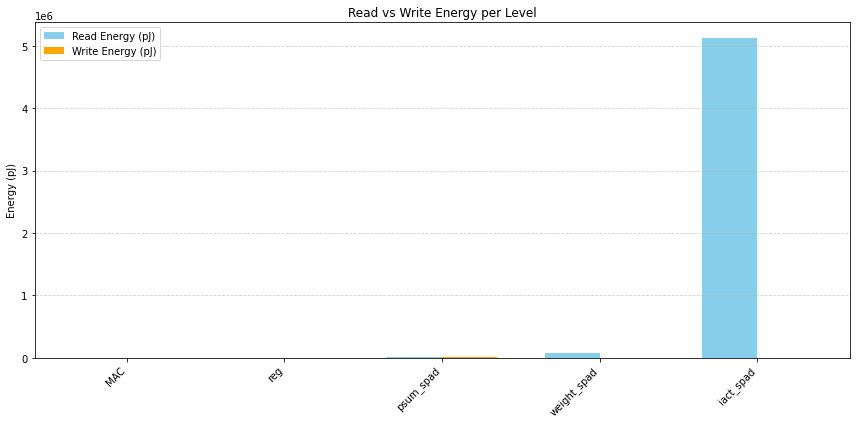

Total Energy: 5209036.10074
Energies {'MAC': 2590.40962, 'reg': 884.7359999999999, 'psum_spad': 10537.55416, 'weight_spad': 76110.848, 'iact_spad': 5118912.55296, 'BackingStorage': 0.0}
Utilization {'MAC': 0.5, 'reg': 0.125, 'psum_spad': 0.03125, 'weight_spad': 0.020833333333333332, 'iact_spad': 0.25, 'BackingStorage': 0}
/home/workspace/2022.micro.artifact/experiments-matmul2/osc6.yaml
['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/osc6.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
       

[  1] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.077 | pJ/Compute = 2512.356 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.077 | pJ/Compute = 2512.356 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =    0.039 | pJ/Compute = 1262.372 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] M4 N2 - L1[O] N4 M2 - L0[I] N1 
[  2] STATEMENT: 10000 invalid mappings (9282 fanout, 718 capacity) found since the last valid mapping, terminating search.
[  3] STATEMENT: 10000 invalid mappings (9287 fanout, 713 capacity) found since the last valid mapping, terminating search.
[  1] STATEMENT: 10000 invalid mappings (9291 fanout, 709 capacity) found since the last valid mapping, terminating search.
[  0] STATEMENT: 10000 invalid mappings (9294 fanout, 706 capacity) found since the last valid mapping, terminating search.
2025-05-06 01:29:03,624 - timeloop_map



Summary stats for best mapping found by mapper:
  Utilization = 0.50 | pJ/Algorithmic-Compute =    0.039 | pJ/Compute = 1262.372
1
Workload /home/workspace/2022.micro.artifact/experiments-matmul2/osc6.yaml
Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/osc6.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.13852810859680176
Timeloop completed successfully.
['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


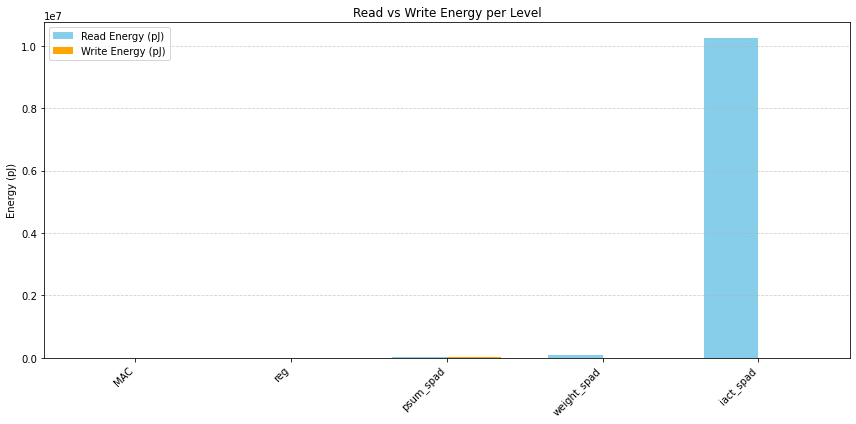

Total Energy: 10336303.91256
Energies {'MAC': 4886.41472, 'reg': 1769.4719999999998, 'psum_spad': 15712.071919999998, 'weight_spad': 76110.848, 'iact_spad': 10237825.10592, 'BackingStorage': 0.0}
Utilization {'MAC': 0.5, 'reg': 0.25, 'psum_spad': 0.03125, 'weight_spad': 0.020833333333333332, 'iact_spad': 0.25, 'BackingStorage': 0}
[18408.80356, 103058.74924, 287065.44795999996, 2133428.3172, 5209036.10074, 10336303.91256]


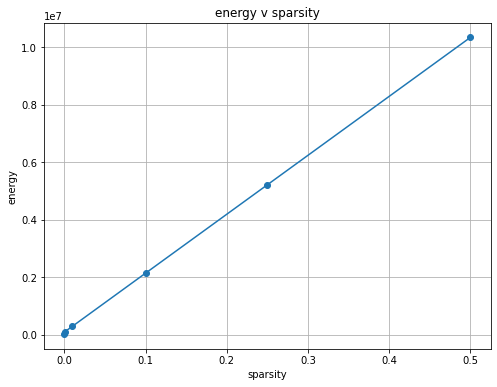

In [9]:
base_workload = "/home/workspace/2022.micro.artifact/experiments-matmul2/"
# mapping_path = "searched_mapping.yaml"
mapper = "/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml"
densities = [0.00018310546875, 0.001, 0.01, 0.1, 0.25, 0.5]
energies = []
for workload in ["osc1", "osc2", "osc3", "osc4", "osc5", "osc6"]:
    workload_path = "".join([base_workload, workload, ".yaml"])
    print(workload_path)
    result = run_timeloop_mapper(
        architecture_yaml=architecture2,
        workload=workload_path,
        sparse_opts=sparse_opts,
        ERT=ERT_output_path,
        ART=ART_output_path,
        output_mapping_path="searched_mapping.yaml",
        mapper=mapper,
        constraints=constraints
    )
    print(1)
    mapping_path = result["best_mapping"]
    energy = run_timeloop_helper(workload_path, mapping_path)
    energies.append(energy)
    
print(energies)
plt.figure(figsize=(8, 6))
plt.plot(densities, energies, marker='o', linestyle='-')
plt.title('energy v sparsity')
plt.xlabel('sparsity')
plt.ylabel('energy')
plt.grid(True)
plt.show()

In [7]:
# # Run Accelergy with the provided arguments
# result = run_accelergy(
#     architecture_yaml=architecture2,
#     component_yaml=component,
#     ERT_output_path=ERT_output_path,
#     ART_output_path=ART_output_path
# )

# print(f"Generated ERT file: {result['ERT']}")
# print(f"Generated ART file: {result['ART']}")

In [ ]:
# # If you want mapper
# # Run Timeloop mapper with the provided arguments
# result = run_timeloop_mapper(
#     architecture_yaml=architecture2,
#     workload=workload,
#     sparse_opts=sparse_opts,
#     ERT=ERT_output_path,
#     ART=ART_output_path,
#     output_mapping_path="searched_mapping.yaml",
#     mapper=mapper,
#     constraints=constraints
# )

# mapping_path = result["best_mapping"]

In [ ]:
# # If you already have mapping
# output_path = run_timeloop(
#     arch_yaml=architecture2,
#     workload=workload,
#     sparse_opts=sparse_opts,
#     mapping=mapping_path,
#     constraints=constraints,
#     mapper=mapper,
#     ert_path=ERT_output_path,
#     art_path=ART_output_path,
#     output_dir="timeloop_output_test_3"
# )

In [ ]:
# # Plot output
# output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
# plot_read_write_energy(output["energy_breakdown_pJ"])